# Lorenz Equations
Sean Wade

In [12]:
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

import matplotlib
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
plt.switch_backend('nbagg')

In [2]:
class Lorenz(object):

    def __init__(self, sigma, rho, beta, start_point, atol=1e-14, rtol=1e-12):
        self.sigma = sigma
        self.rho = rho
        self.start_point = start_point
        self.beta = beta
        self.atol = atol
        self.rtol = rtol

    def lorenz_ode(self, inputs, T):
        """
        Args:
          inputs : Initial position in form [x,y,z]
          T : System at time T

        Returns:
          Xprime
          Yprime
          Zprime  
        """
        Xprime = self.sigma*(inputs[1] - inputs[0]) 
        Yprime = self.rho*inputs[0] - inputs[1] - inputs[0]*inputs[2]
        Zprime = inputs[0]*inputs[1] - self.beta*inputs[2]
        return Xprime, Yprime, Zprime
    
    def solve_lorenz(self, time=50):
        T = np.linspace(0, time, time*100) #initialize time interval for ode
        sol = odeint(self.lorenz_ode, self.start_point, T, atol=self.atol, rtol=self.rtol).T
        X, Y, Z = sol[0, :], sol[1, :], sol[2, :]
        return X, Y, Z
    
    def plot(self, fig, time=50):
        ax = fig.gca(projection='3d')
        X, Y, Z = self.solve_lorenz(time)
        ax.plot(X, Y, Z)

In [3]:
sigma = 10
rho = 28
beta = 8/3
time = 50

### Problem 1

<IPython.core.display.Javascript object>


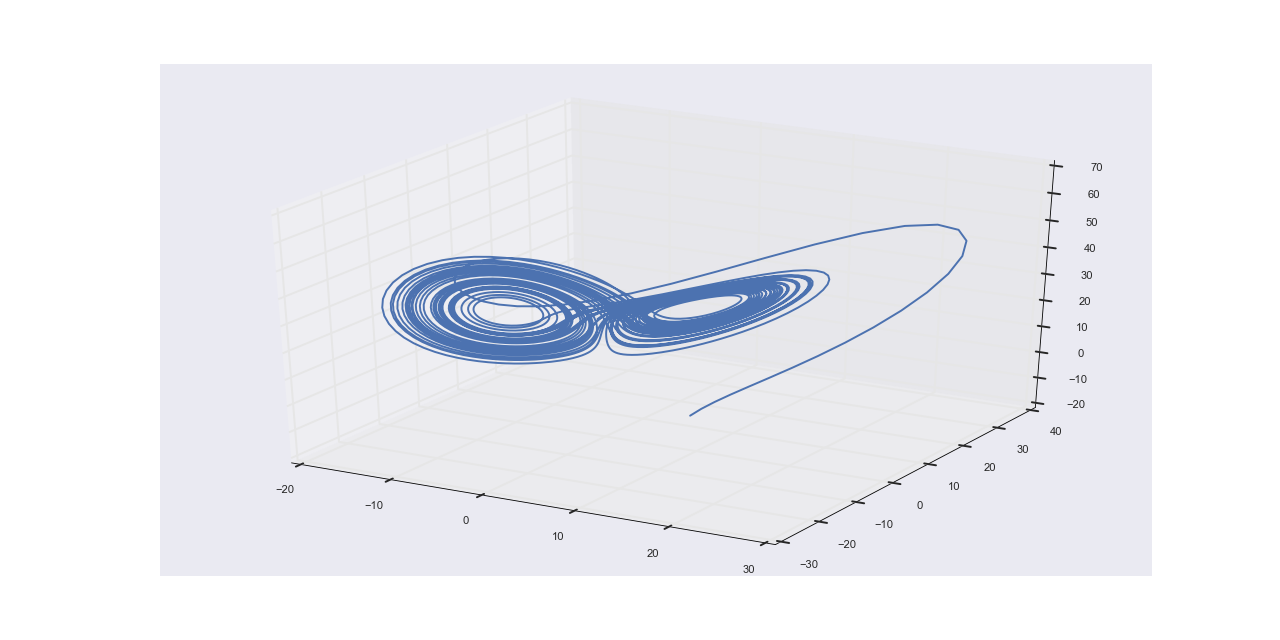

<IPython.core.display.Javascript object>


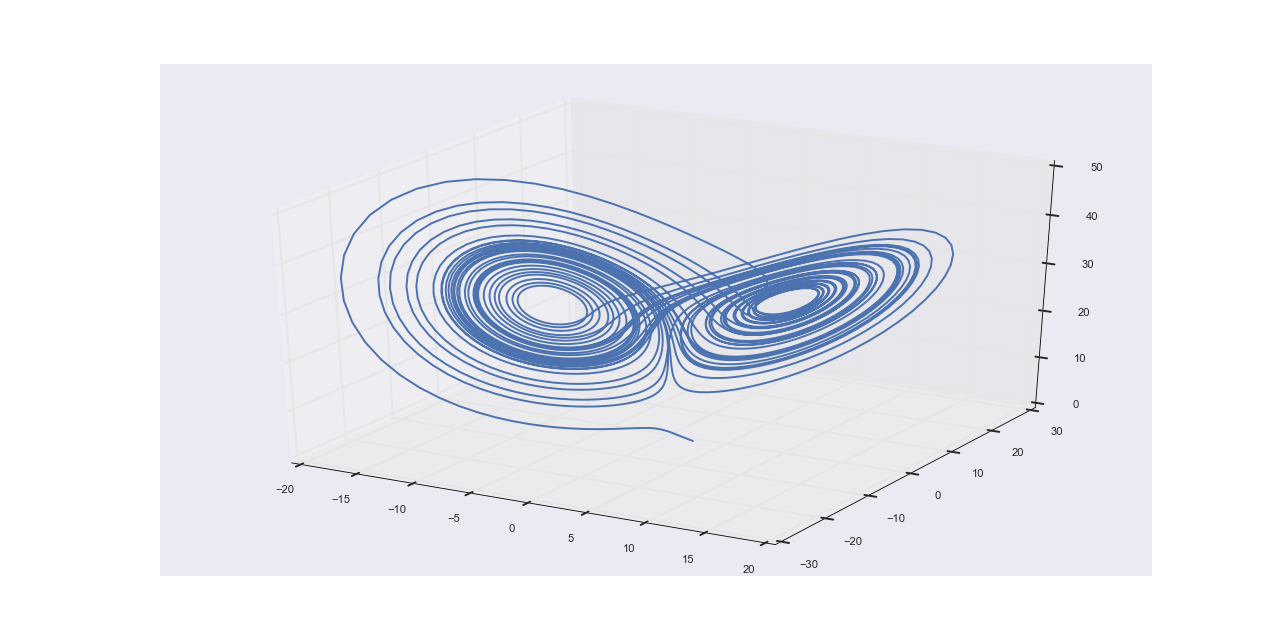

In [14]:
start_point = np.random.uniform(-15, 15, 3)
fig = plt.figure(figsize=(16, 8))
Lorenz(sigma, rho, beta, start_point).plot(fig)
plt.show()

### Problem 2

<IPython.core.display.Javascript object>


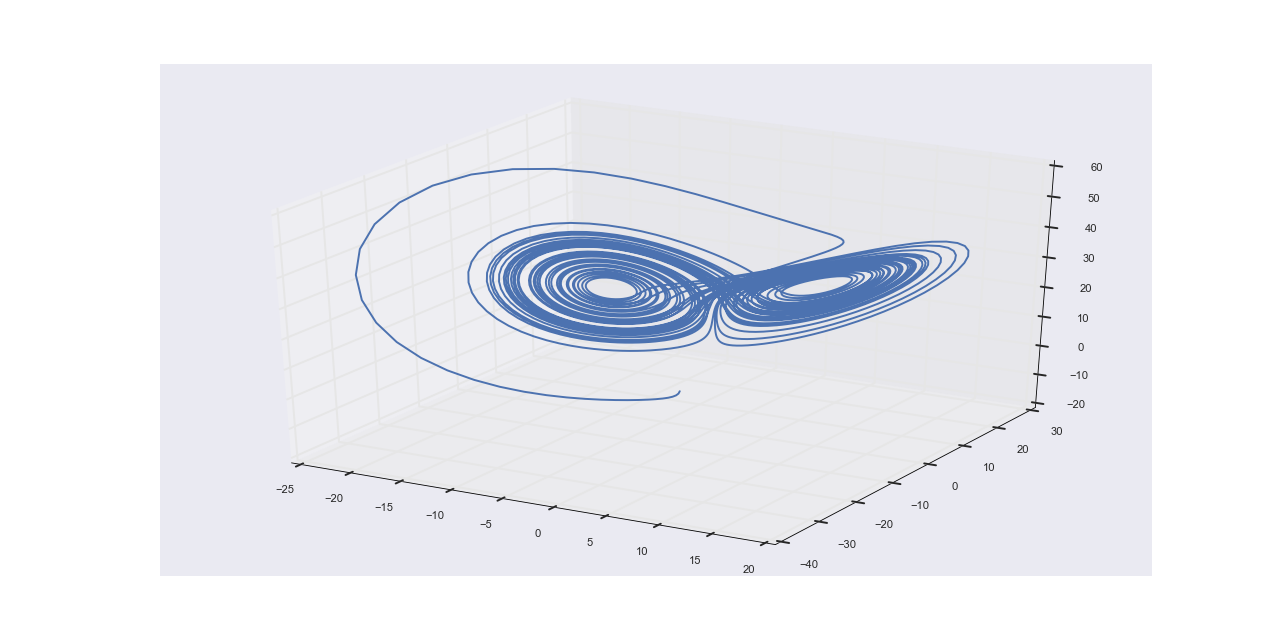

<IPython.core.display.Javascript object>


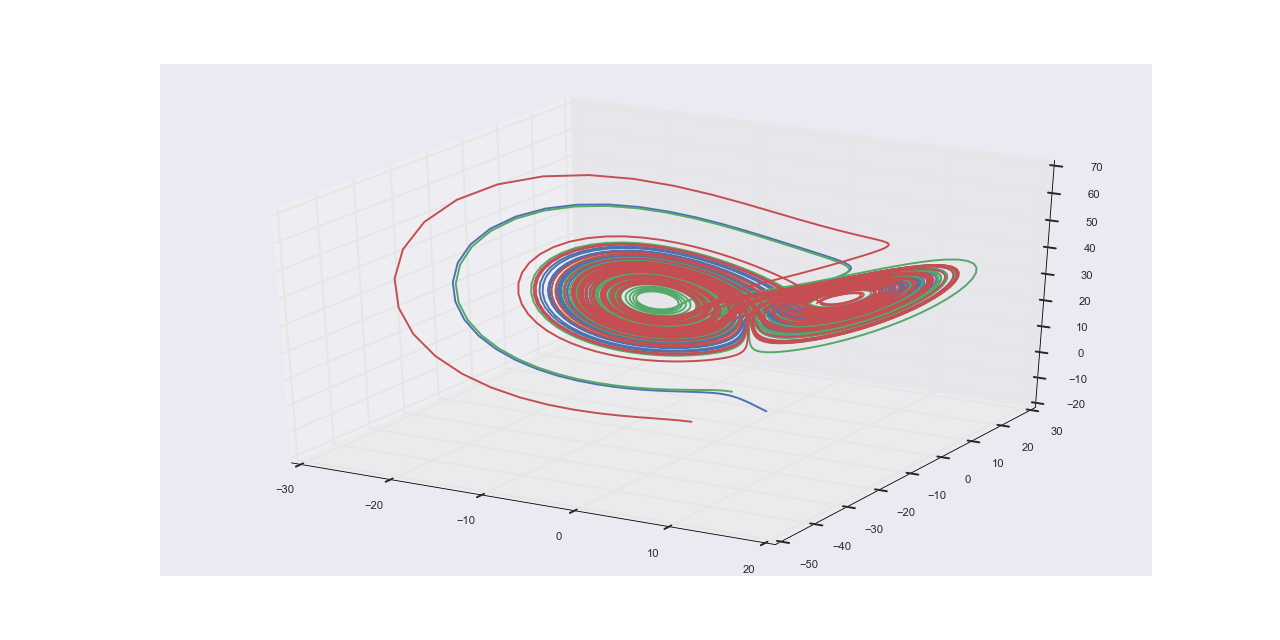

In [5]:
fig = plt.figure(figsize=(16, 8))
for i in xrange(3):
    start_point = np.random.uniform(-15, 15, 3)
    Lorenz(sigma, rho, beta, start_point).plot(fig)
plt.show()

### Problem 3

In [9]:
fig = plt.figure(figsize=(16, 8))
start_point = (np.random.rand(3) - 1/2) * 30
permutation = np.random.randn(3)*(1e-10)
Lorenz(sigma, rho, beta, start_point).plot(fig)
Lorenz(sigma, rho, beta, start_point+permutation).plot(fig)
plt.show()

### Problem 4

In [6]:
from matplotlib.animation import FuncAnimation

In [7]:
plt.switch_backend('qt4agg')
def animate(sol1, sol2, time=50, granularity=25):
    t1, x1, y1, z1 = time, sol1[0], sol1[1], sol1[2]
    t2, x2, y2, z2 = time, sol2[0], sol2[1], sol2[2]

    #Create a figure and set the window boundaries
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((-10, 60))

    sol1_drawing, = ax.plot([], [], [])
    sol2_drawing, = ax.plot([], [], [])
    
    def update(index):
        i = index*granularity
        sol1_drawing.set_data(x1[:i], y1[:i])
        sol1_drawing.set_3d_properties(z1[:i])
        sol2_drawing.set_data(x2[:i], y2[:i])
        sol2_drawing.set_3d_properties(z2[:i])
        return sol1_drawing, sol2_drawing,
    
    anim = animation.FuncAnimation(fig, update, frames=len(x1)/granularity, interval=10, blit=True)
    plt.show()
    return anim

In [8]:
starting_point = np.random.uniform(-15,15, 3)
permutation = np.random.randn(3)*(1e-10)
sol1 = Lorenz(sigma, rho, beta, start_point).solve_lorenz()
sol2 = Lorenz(sigma, rho, beta, start_point + permutation).solve_lorenz()
animate(sol1, sol2)

### Problem 5

In [11]:
starting_point = np.random.uniform(-15,15, 3)
sol1 = Lorenz(sigma, rho, beta, start_point).solve_lorenz()
sol2 = Lorenz(sigma, rho, beta, start_point, atol=1e-15, rtol=1e-13).solve_lorenz()
animate(sol1, sol2)

### Problem 6

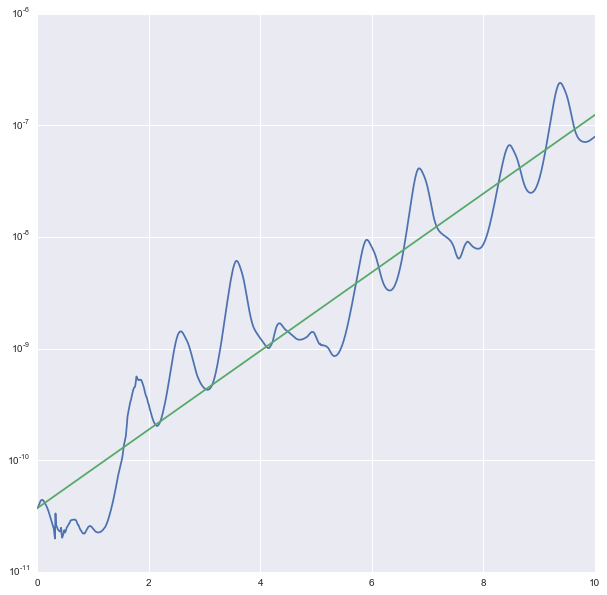

In [12]:
from scipy import linalg as la
from scipy.stats import linregress

start_point = np.random.uniform(-15, 15, 3)
X, Y, Z = Lorenz(sigma, rho, beta, start_point).solve_lorenz(time=50)

perturbation = np.random.randn(3)*(1e-10)
start_point1 = np.array([X[-1], Y[-1], Z[-1]]) + perturbation
sol1 = Lorenz(sigma, rho, beta, start_point1).solve_lorenz(time=10)

start_point2 = np.array([X[-1], Y[-1], Z[-1]])
sol2 = Lorenz(sigma, rho, beta, start_point2).solve_lorenz(time=10)

norm = la.norm(np.vstack((sol1[0] - sol2[0], sol1[1] - sol2[1], sol1[2] - sol2[2])), axis=0)

fig=plt.figure(figsize=(10, 10))
log_norm = np.log(norm)
T = np.linspace(0, 10, 1000)
slope, intercept, r_value, p_value, slope_std_error = linregress(T, log_norm)
predict = intercept + slope*T

plt.semilogy(T, norm)
plt.semilogy(T, np.exp(predict))
plt.show()